# This notebook compares the outputs from VESIcal to the Shishkina et al. (2014) Calibration dataset. 
- This notebook relies on the Excel spreadsheet entitled: "Testing_Shishkina_et_al_2014.xlsx"
- Test 1 compares the experimental pressures in the calibration dataset of Shishkina et al. (2014) for CO$_2$-only experiments to the saturation pressures obtained from VESIcal for the "ShishkinaCarbon" model. 
- Test 2 compares the experimental pressures in the calibration dataset of Shishkina et al. (2014) for H$_2$O-only experiments to the saturation pressures obtained from VESIcal for the "ShishkinaWater" model. 
- Test 3 compares the experimental pressures for mixed H$_2$O-CO$_2$ bearing fluids presented in Table 2 of the main text to the saturation pressures obtained from VESIcal for the "Shishkina" model.
- Test 4 justifies the approach used in VESIcal, where cation fractions for their equation 9 are calculated ignoring H$_2$O and CO$_2$
- Test 5 compares the 500 MPa isobars from VESIcal to those shown in their Fig. 6 for 4 compositions.

In [1]:
import VESIcal as v
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, HTML
import pandas as pd
import matplotlib as mpl
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
%matplotlib inline

/opt/conda/lib/python3.7/site-packages/patsy/constraint.py:13: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [2]:
msp_fontdict = {'family': 'serif',
				 'color': 'darkblue',
				 'weight': 'normal',
				 'size': 18,}

plt.rcParams["font.family"] = 'arial'
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.style.use("seaborn-colorblind")
mpl.rcParams['patch.linewidth'] = 1
mpl.rcParams['axes.linewidth'] = 1 # set the value globally
%matplotlib inline
sns.set(style="ticks", context="poster",rc={"grid.linewidth": 1,"xtick.major.width": 1,"ytick.major.width": 1, 'patch.edgecolor': 'black'})

## Test 1 - CO$_2$ only experiments. 

In [3]:
myfile_CO2 = v.ExcelFile('Testing_Shishkina_et_al_2014.xlsx',   input_type='wtpercent', sheet_name='CO2')
data_CO2 = myfile_CO2.data
satPs_wtemps_Shish_CO2= myfile_CO2.calculate_saturation_pressure(temperature="Temp", model='ShishkinaCarbon')
satPs_wtemps_Shish_CO2.head()


,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,NiO,CoO,...,K2O,P2O5,H2O,CO2,Press,Temp,Reference,SaturationP_bars_VESIcal,Model,Warnings
Label,,,,,,,,,,,,,,,,,,,,,
1,50.175018,0.920092,18.281828,0.0,0,9.370937,0.170017,7.000700,0,0,...,0.230023,0.150015,0,0.018,500,1250,"Shishkina et al., 2010 1",457.395687,ShishkinaCarbon,The pressure is outside the calibration range ...
2,47.327420,2.353128,14.179890,0.0,0,10.825606,0.173174,10.370063,0,0,...,0.835310,0.468588,0,0.027,500,1250,This study,388.720580,ShishkinaCarbon,The pressure is outside the calibration range ...
3,43.666155,2.638655,12.659386,0.0,0,11.548572,0.195076,12.074159,0,0,...,1.006180,0.698166,0,0.075,500,1250,This study,525.467523,ShishkinaCarbon,
4,42.355137,2.260615,11.805435,0.0,0,11.009208,0.188385,13.322978,0,0,...,0.962855,1.130308,0,0.115,500,1250,This study,543.222277,ShishkinaCarbon,
5,48.342182,1.773014,16.397876,0.0,0,10.477812,0.200341,5.970149,0,0,...,1.963338,0.591005,0,0.022,500,1250,This study,393.640444,ShishkinaCarbon,The pressure is outside the calibration range ...


### X Y plot of experimental pressure vs. VESIcal Saturation Pressure

Text(4200, 4000, '1:1 line')

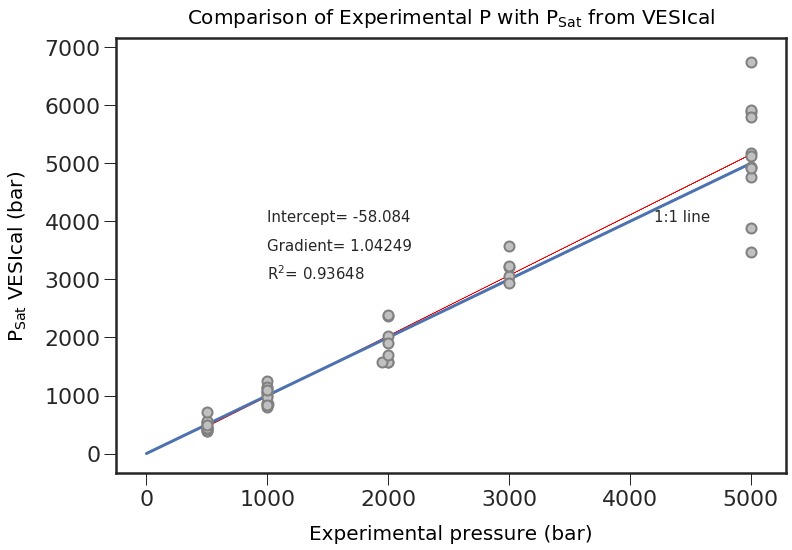

In [4]:
X=data_CO2['Press'].values.reshape(-1, 1) # Convert MPa from their supplement to bars
Y=satPs_wtemps_Shish_CO2['SaturationP_bars_VESIcal'].values.reshape(-1, 1)
# Calculating best fit line
lr=LinearRegression()
lr.fit(X,Y)
Y_pred=lr.predict(X)
# Plotting
fig, ax1 = plt.subplots(figsize = (12,8)) # adjust dimensions of figure here
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
ax1.set_title('Comparison of Experimental P with P$_{Sat}$ from VESIcal',
        fontdict= font, pad = 15)
plt.xlabel('Experimental pressure (bar)', fontdict=font, labelpad = 15)
plt.ylabel('P$_{Sat}$ VESIcal (bar)', fontdict=font, labelpad = 15)
plt.plot(X,Y_pred, color='red', linewidth=0.5, zorder=1)
plt.scatter(data_CO2['Press'], satPs_wtemps_Shish_CO2['SaturationP_bars_VESIcal'],  s=100, edgecolors='gray', facecolors='silver', marker='o', zorder=5)
plt.plot([0, 5000], [0, 5000])
I='Intercept= ' + str(np.round(lr.intercept_, 3))[1:-1]
G='Gradient= '  + str(np.round(lr.coef_, 5))[2:-2]
R='R$^2$= ' +  str(np.round(r2_score(Y, Y_pred), 5)) 
plt.text(1000, 4000, I, fontsize=15)
plt.text(1000, 3500, G, fontsize=15)
plt.text(1000, 3000, R, fontsize=15)
one='1:1 line'
plt.text(4200, 4000, one, fontsize=15)

## Test 2 - H$_2$O experiments

In [5]:
myfile_H2O = v.ExcelFile('Testing_Shishkina_et_al_2014.xlsx',   input_type='wtpercent', sheet_name='H2O')
data_H2O = myfile_H2O.data
satPs_wtemps_Shish_H2O= myfile_H2O.calculate_saturation_pressure(temperature="Temp", model='ShishkinaWater')
satPs_wtemps_Shish_H2O.head()

/home/jovyan/ThermoEngine/Notebooks/Development/Final_Model_Tests_Agree/VESIcal.py:567: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  normalized = pd.Series({})
/home/jovyan/ThermoEngine/Notebooks/Development/Final_Model_Tests_Agree/VESIcal.py:3052: RuntimeWarning: Saturation pressure not found.
  warnings.warn("Saturation pressure not found.",RuntimeWarning)


,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,NiO,CoO,...,K2O,P2O5,H2O,CO2,Press,Temp,Reference,SaturationP_bars_VESIcal,Model,Warnings
Label,,,,,,,,,,,,,,,,,,,,,
1,50.175018,0.920092,18.281828,0,0,9.370937,0.170017,7.000700,0,0,...,0.230023,0.150015,2.300000,0,500,1250,"Shishkina et al., 2010",566.480555,ShishkinaWater,
2,50.175018,0.920092,18.281828,0,0,9.370937,0.170017,7.000700,0,0,...,0.230023,0.150015,2.970000,0,1000,1250,"Shishkina et al., 2010",906.233784,ShishkinaWater,
3,46.237383,2.700445,14.656611,0,0,11.751120,0.164913,8.719756,0,0,...,1.061625,0.556580,3.376645,0,1000,1250,This study B2518,1054.379001,ShishkinaWater,
4,47.327420,2.353128,14.179890,0,0,10.825606,0.173174,10.370063,0,0,...,0.835310,0.468588,3.310677,0,1000,1250,This study B2507,1027.128816,ShishkinaWater,
5,43.666155,2.638655,12.659386,0,0,11.548572,0.195076,12.074159,0,0,...,1.006180,0.698166,3.133135,0,1000,1250,This study A2549,929.158163,ShishkinaWater,


### X Y plot of experimental pressure vs. VESIcal Saturation Pressure

Text(6000, 6000, '1:1')

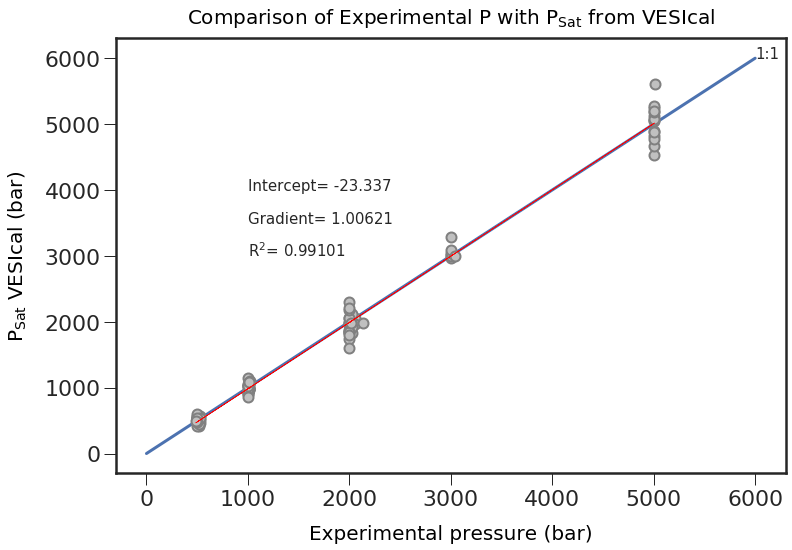

In [6]:
XH2O=data_H2O['Press'] # Convert MPa from their supplement to bars
YH2O=satPs_wtemps_Shish_H2O['SaturationP_bars_VESIcal']
maskH2O = ~np.isnan(XH2O) & ~np.isnan(YH2O)
X_noNan=XH2O[maskH2O].values.reshape(-1, 1)
Y_noNan=YH2O[maskH2O].values.reshape(-1, 1)
lr=LinearRegression()
lr.fit(X_noNan,Y_noNan)
Y_predH2O=lr.predict(X_noNan)
# Plotting
fig, ax1 = plt.subplots(figsize = (12,8)) # adjust dimensions of figure here
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
ax1.set_title('Comparison of Experimental P with P$_{Sat}$ from VESIcal',
        fontdict= font, pad = 15)
plt.xlabel('Experimental pressure (bar)', fontdict=font, labelpad = 15)
plt.ylabel('P$_{Sat}$ VESIcal (bar)', fontdict=font, labelpad = 15)
plt.plot(X_noNan,Y_predH2O, color='red', linewidth=0.5, zorder=5)
plt.scatter(data_H2O['Press'], satPs_wtemps_Shish_H2O['SaturationP_bars_VESIcal'],  s=100, edgecolors='gray', facecolors='silver', marker='o', zorder=5)

I='Intercept= ' + str(np.round(lr.intercept_, 3))[1:-1]
G='Gradient= '  + str(np.round(lr.coef_, 5))[2:-2]
R='R$^2$= ' +  str(np.round(r2_score(Y_noNan, Y_predH2O), 5)) 
one='1:1'
plt.plot([0, 6000], [0, 6000], zorder=1)
plt.text(1000, 4000, I, fontsize=15)
plt.text(1000, 3500, G, fontsize=15)
plt.text(1000, 3000, R, fontsize=15)
plt.text(6000, 6000, one, fontsize=15)

## Test 3 - Mixed H$_2$O - CO$_2$ experiments from Table 2 in the text. 

In [7]:
myfile_Comb = v.ExcelFile('Testing_Shishkina_et_al_2014.xlsx',   input_type='wtpercent', sheet_name='Table2_Text')
data_Comb = myfile_Comb.data
satPs_wtemps_Shish_Comb= myfile_Comb.calculate_saturation_pressure(temperature="Temp", model='Shishkina')
satPs_wtemps_Shish_Comb.head()

,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,NiO,CoO,...,K2O,P2O5,H2O,CO2,Press,Temp,Sample,SaturationP_bars_VESIcal,Model,Warnings
Label,,,,,,,,,,,,,,,,,,,,,
1,46.237383,2.700445,14.656611,0.0,0.0,11.75112,0.164913,8.719756,0.0,0.0,...,1.061625,0.55658,3.38,0.0000,1000.0,1250.0,B2518,1056.093836,Shishkina,
2,46.237383,2.700445,14.656611,0.0,0.0,11.75112,0.164913,8.719756,0.0,0.0,...,1.061625,0.55658,3.10,0.0000,1000.0,1250.0,B2518,915.155936,Shishkina,
3,46.237383,2.700445,14.656611,0.0,0.0,11.75112,0.164913,8.719756,0.0,0.0,...,1.061625,0.55658,2.29,0.0284,1000.0,1250.0,B2518,918.867246,Shishkina,
4,46.237383,2.700445,14.656611,0.0,0.0,11.75112,0.164913,8.719756,0.0,0.0,...,1.061625,0.55658,0.00,0.0648,1000.0,1250.0,B2518,794.701595,Shishkina,
5,46.237383,2.700445,14.656611,0.0,0.0,11.75112,0.164913,8.719756,0.0,0.0,...,1.061625,0.55658,0.88,0.0706,1000.0,1250.0,B2518,856.204946,Shishkina,


### X Y plot of experimental pressure vs. VESIcal Saturation Pressure
- Note, if the experiments at 5000 bars are excluded by setting (XComb<5000), the gradient is much more similar to 1, as the large scatter at this pressure results in a relatively large error on the linear regression line. 

Text(6000, 6000, '1:1')

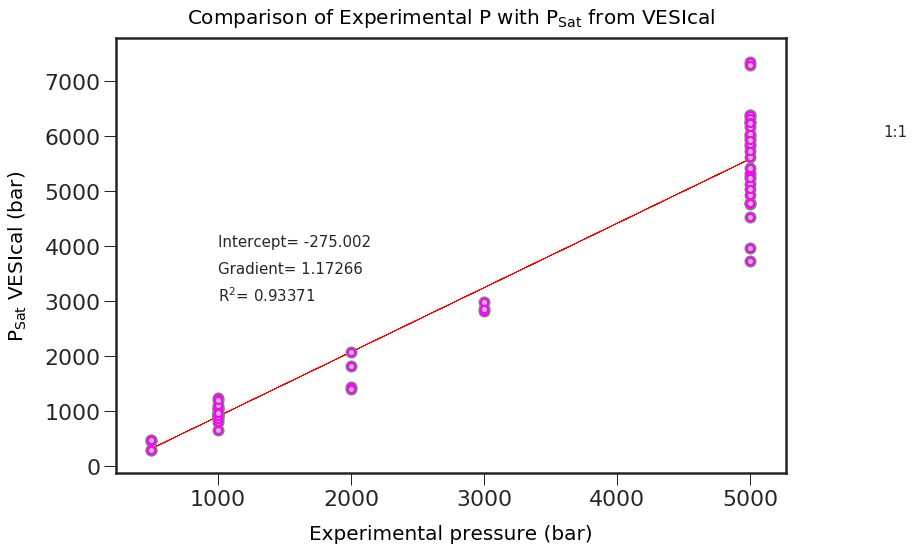

In [8]:
XComb=data_Comb['Press'] # Convert MPa from their supplement to bars
YComb=satPs_wtemps_Shish_Comb['SaturationP_bars_VESIcal']
maskComb = (XComb>-1) & (YComb>-1) & (XComb<7000)
#maskComb = ~np.isnan(XComb) & ~np.isnan(YComb) & XComb<3500
X_noNan=XComb[maskComb].values.reshape(-1, 1)
Y_noNan=YComb[maskComb].values.reshape(-1, 1)
lr=LinearRegression()
lr.fit(X_noNan,Y_noNan)
Y_predComb=lr.predict(X_noNan)
# Plotting
fig, ax1 = plt.subplots(figsize = (12,8)) # adjust dimensions of figure here
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
ax1.set_title('Comparison of Experimental P with P$_{Sat}$ from VESIcal',
        fontdict= font, pad = 15)
plt.xlabel('Experimental pressure (bar)', fontdict=font, labelpad = 15)
plt.ylabel('P$_{Sat}$ VESIcal (bar)', fontdict=font, labelpad = 15)
plt.plot(X_noNan,Y_predComb, color='red', linewidth=0.5, zorder=1)
plt.scatter(data_Comb['Press'], satPs_wtemps_Shish_Comb['SaturationP_bars_VESIcal'],  s=100, edgecolors='gray', facecolors='silver', marker='o', zorder=5)
plt.scatter(X_noNan, Y_noNan,  s=50, edgecolors='magenta', facecolors='silver', marker='o', zorder=5)

I='Intercept= ' + str(np.round(lr.intercept_, 3))[1:-1]
G='Gradient= '  + str(np.round(lr.coef_, 5))[2:-2]
R='R$^2$= ' +  str(np.round(r2_score(Y_noNan, Y_predComb), 5)) 
one='1:1'
#plt.plot([0, 6000], [0, 6000])
plt.text(1000, 4000, I, fontsize=15)
plt.text(1000, 3500, G, fontsize=15)
plt.text(1000, 3000, R, fontsize=15)
plt.text(6000, 6000, one, fontsize=15)

## Test 4 - Intepretation of "atomic fractions of cations in Equation 9.
- We can only recreate the chemical data for cation fractions shown in their Fig. 7a if the "atomic fractions of cations" are calculated excluding volatiles. Including atomic proportions including H$_2$O and CO$_2$ results in a significantly worse fit to experimental data for the ShishkinaWater model shown in test 2 (gradient of 1.11 vs. 1.006 when done this way). This is not relevant for the CO$_2$O model, where the compositional dependence is expressed as a fraction, so the normalizatoin routine doesn't affect the result. 

In [9]:
# Removed CO2 and H2O
oxides = ['SiO2', 'TiO2', 'Al2O3', 'Fe2O3', 'Cr2O3', 'FeO', 'MnO', 'MgO', 'NiO', 'CoO', 'CaO', 'Na2O', 'K2O', 'P2O5']
oxideMass = {'SiO2': 28.085+32, 'MgO': 24.305+16, 'FeO': 55.845+16, 'CaO': 40.078+16, 'Al2O3': 2*26.982+16*3, 'Na2O': 22.99*2+16,
			 'K2O': 39.098*2+16, 'MnO': 54.938+16, 'TiO2': 47.867+32, 'P2O5': 2*30.974+5*16, 'Cr2O3': 51.996*2+3*16,
			 'NiO': 58.693+16, 'CoO': 28.01+16, 'Fe2O3': 55.845*2+16*3}
CationNum = {'SiO2': 1, 'MgO': 1, 'FeO': 1, 'CaO': 1, 'Al2O3': 2, 'Na2O': 2,
			 'K2O': 2, 'MnO': 1, 'TiO2': 1, 'P2O5': 2, 'Cr2O3': 2,
			 'NiO': 1, 'CoO': 1, 'Fe2O3': 2}

In [20]:
Normdata = v.normalize_AdditionalVolatiles(myfile_H2O)

In [21]:
for ind,row in Normdata.iterrows():
    for ox in oxides:
        Normdata.loc[ind, ox + 'molar']=((row[ox]*CationNum[ox])/oxideMass[ox]) # helps us get desired column name with its actual name, rather than its index. If by number, do by iloc. 
        #oxide_molar[ind, ox]=ox+'molar'
    Normdata.loc[ind,'sum']=sum(Normdata.loc[ind, ox+'molar'] for ox in oxides)
    for ox in oxides:
        Normdata.loc[ind, ox + 'norm']=Normdata.loc[ind, ox+'molar']/Normdata.loc[ind, 'sum']
            # helps us get desired column name with its actual name, rather than its index. If by number, do by iloc. 
Normdata.head()

,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,NiO,CoO,...,Cr2O3norm,FeOnorm,MnOnorm,MgOnorm,NiOnorm,CoOnorm,CaOnorm,Na2Onorm,K2Onorm,P2O5norm
Label,,,,,,,,,,,,,,,,,,,,,
1,50.175018,0.920092,18.281828,0.0,0.0,9.370937,0.170017,7.000700,0.0,0.0,...,0.0,0.072597,0.001334,0.096675,0.0,0.0,0.112861,0.041851,0.002718,0.001176
2,50.175018,0.920092,18.281828,0.0,0.0,9.370937,0.170017,7.000700,0.0,0.0,...,0.0,0.072597,0.001334,0.096675,0.0,0.0,0.112861,0.041851,0.002718,0.001176
3,46.237383,2.700445,14.656611,0.0,0.0,11.751120,0.164913,8.719756,0.0,0.0,...,0.0,0.090539,0.001287,0.119756,0.0,0.0,0.104996,0.062780,0.012477,0.004341
4,47.327420,2.353128,14.179890,0.0,0.0,10.825606,0.173174,10.370063,0.0,0.0,...,0.0,0.082744,0.001341,0.141287,0.0,0.0,0.097358,0.062455,0.009739,0.003626
5,43.666155,2.638655,12.659386,0.0,0.0,11.548572,0.195076,12.074159,0.0,0.0,...,0.0,0.087732,0.001501,0.163502,0.0,0.0,0.115116,0.064915,0.011660,0.005369


In [17]:
### Comparison of these cation fractions to those shown in their Fig. 7a

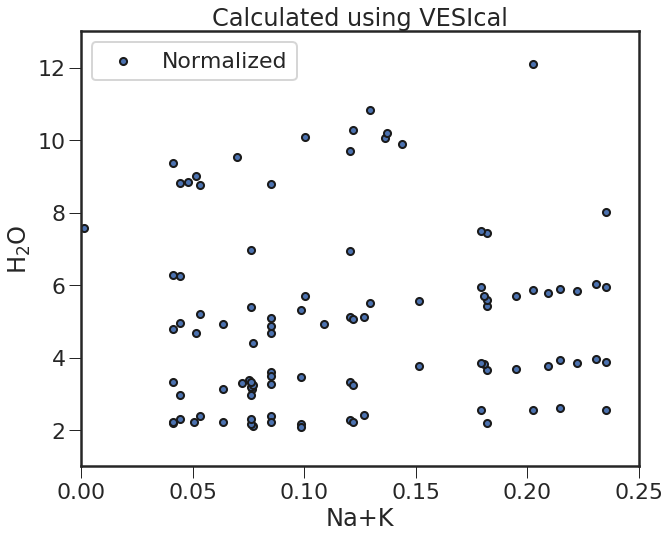

In [22]:
fig, ax1 = plt.subplots(figsize = (10,8)) # adjust dimensions of figure here
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
plt.xlim([0, 0.25])
plt.ylim([1, 13])
plt.title('Calculated using VESIcal')
plt.scatter(Normdata['Na2Onorm']+Normdata['K2Onorm'], Normdata['H2O'], edgecolor='k', facecolor='b', s=50, label='Normalized')
plt.xlabel('Na+K')
plt.ylabel('H$_2$O')
plt.legend()

# Their graph below

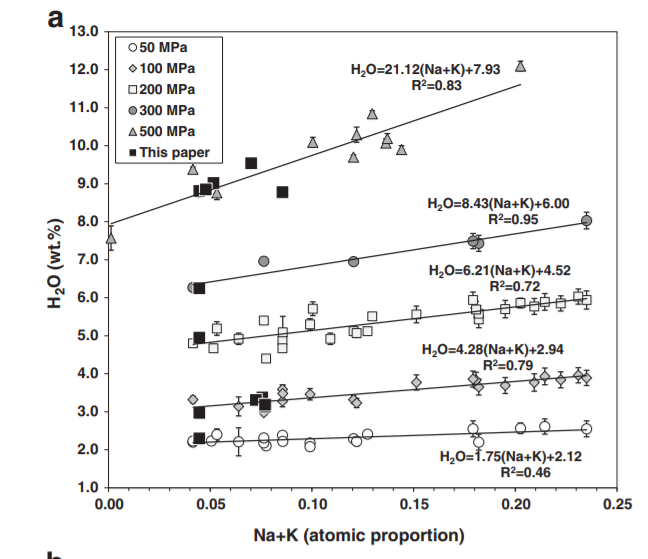

# Test 5 - 500 MPa isobars
- say that "Solid lines represent 500 MPa isobars for nephelinite E2624, basanite A2549 and alkali basalts B2518 and B2507 (see Fig. 5). D"

In [12]:
myfile_Isobars= v.ExcelFile('Testing_Shishkina_et_al_2014.xlsx',   input_type='wtpercent', sheet_name='Isobars')
data_Isobars = myfile_Isobars.data

In [13]:
"""To get composition from a specific sample in the input data:"""
# 2624
SampleName_E2624 = 'E2624'
bulk_comp_E2624 = myfile_Isobars.get_sample_oxide_comp(SampleName_E2624, norm='standard')
# 2549
SampleName_A2549 = 'A2549'
bulk_comp_A2549 = myfile_Isobars.get_sample_oxide_comp(SampleName_A2549, norm='standard')
#
SampleName_B2518  = 'B2518'
bulk_comp_B2518= myfile_Isobars.get_sample_oxide_comp(SampleName_B2518, norm='standard')
#
SampleName_B2507  = 'B2507'
bulk_comp_B2507= myfile_Isobars.get_sample_oxide_comp(SampleName_B2507, norm='standard')


"""Define all variables to be passed to the function for calculating isobars and isopleths"""
"""Define the temperature in degrees C"""
temperature = 1250

"""Define a list of pressures in bars:"""
pressures = [5000]

isobars_E2624, isopleths_E2624 = v.calculate_isobars_and_isopleths(sample=bulk_comp_E2624, model='Shishkina',
                                            temperature=temperature,
                                            pressure_list=pressures,
                                            isopleth_list=[0.01, 0.1, 0.25, 0.3, 0.5, 0.7, 1],
                                            print_status=True).result
isobars_A2549, isopleths_A2549 = v.calculate_isobars_and_isopleths(sample=bulk_comp_A2549, model='Shishkina',
                                            temperature=temperature,
                                            pressure_list=pressures,
                                            isopleth_list=[0.01, 0.1, 0.25, 0.3, 0.5, 0.7, 1],
                                            print_status=True).result
isobars_B2518, isopleths_B2518 = v.calculate_isobars_and_isopleths(sample=bulk_comp_B2518, model='Shishkina',
                                            temperature=temperature,
                                            pressure_list=pressures,
                                            isopleth_list=[0.01, 0.1, 0.25, 0.3, 0.5, 0.7, 1],
                                            print_status=True).result
isobars_B2507, isopleths_B2507 = v.calculate_isobars_and_isopleths(sample=bulk_comp_B2507, model='Shishkina',
                                            temperature=temperature,
                                            pressure_list=pressures,
                                            isopleth_list=[0.01, 0.1, 0.25, 0.3, 0.5, 0.7, 1],
                                            print_status=True).result
#v.plot_isobars_and_isopleths(isobars, isopleths)

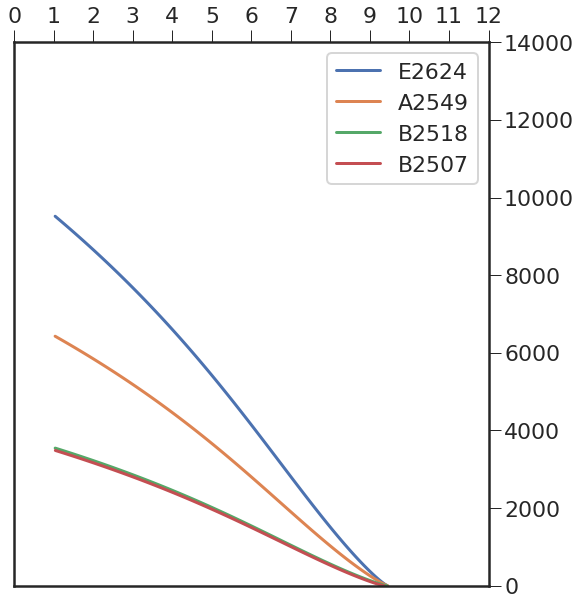

In [14]:
#index1000bars=isobars["Pressure"]==1000
fig, ax1 = plt.subplots(figsize = (17/2,20/2))
plt.plot(isobars_E2624["H2O_liq"], (10**4)*isobars_E2624["CO2_liq"], label='E2624')#, edgecolor='k', facecolor='b', s=50
plt.plot(isobars_A2549["H2O_liq"], (10**4)*isobars_A2549["CO2_liq"], label='A2549')#, edgecolor='k', facecolor='r', s=50
plt.plot(isobars_B2518["H2O_liq"], (10**4)*isobars_B2518["CO2_liq"], label='B2518')# edgecolor='k', facecolor='k', s=50
plt.plot(isobars_B2507["H2O_liq"], (10**4)*isobars_B2507["CO2_liq"], label='B2507')# edgecolor='y', facecolor='y', s=5
#plt.xlabel('H$_2$O (wt%)')
#plt.ylabel('CO$_2$ (wt%)')
plt.legend()
ax1.yaxis.tick_right()
ax1.xaxis.tick_top()
plt.ylim([0, 14000])
plt.xlim([0, 12])
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
fig.savefig('Shishkina_Isobars_2.svg', transparent=True)

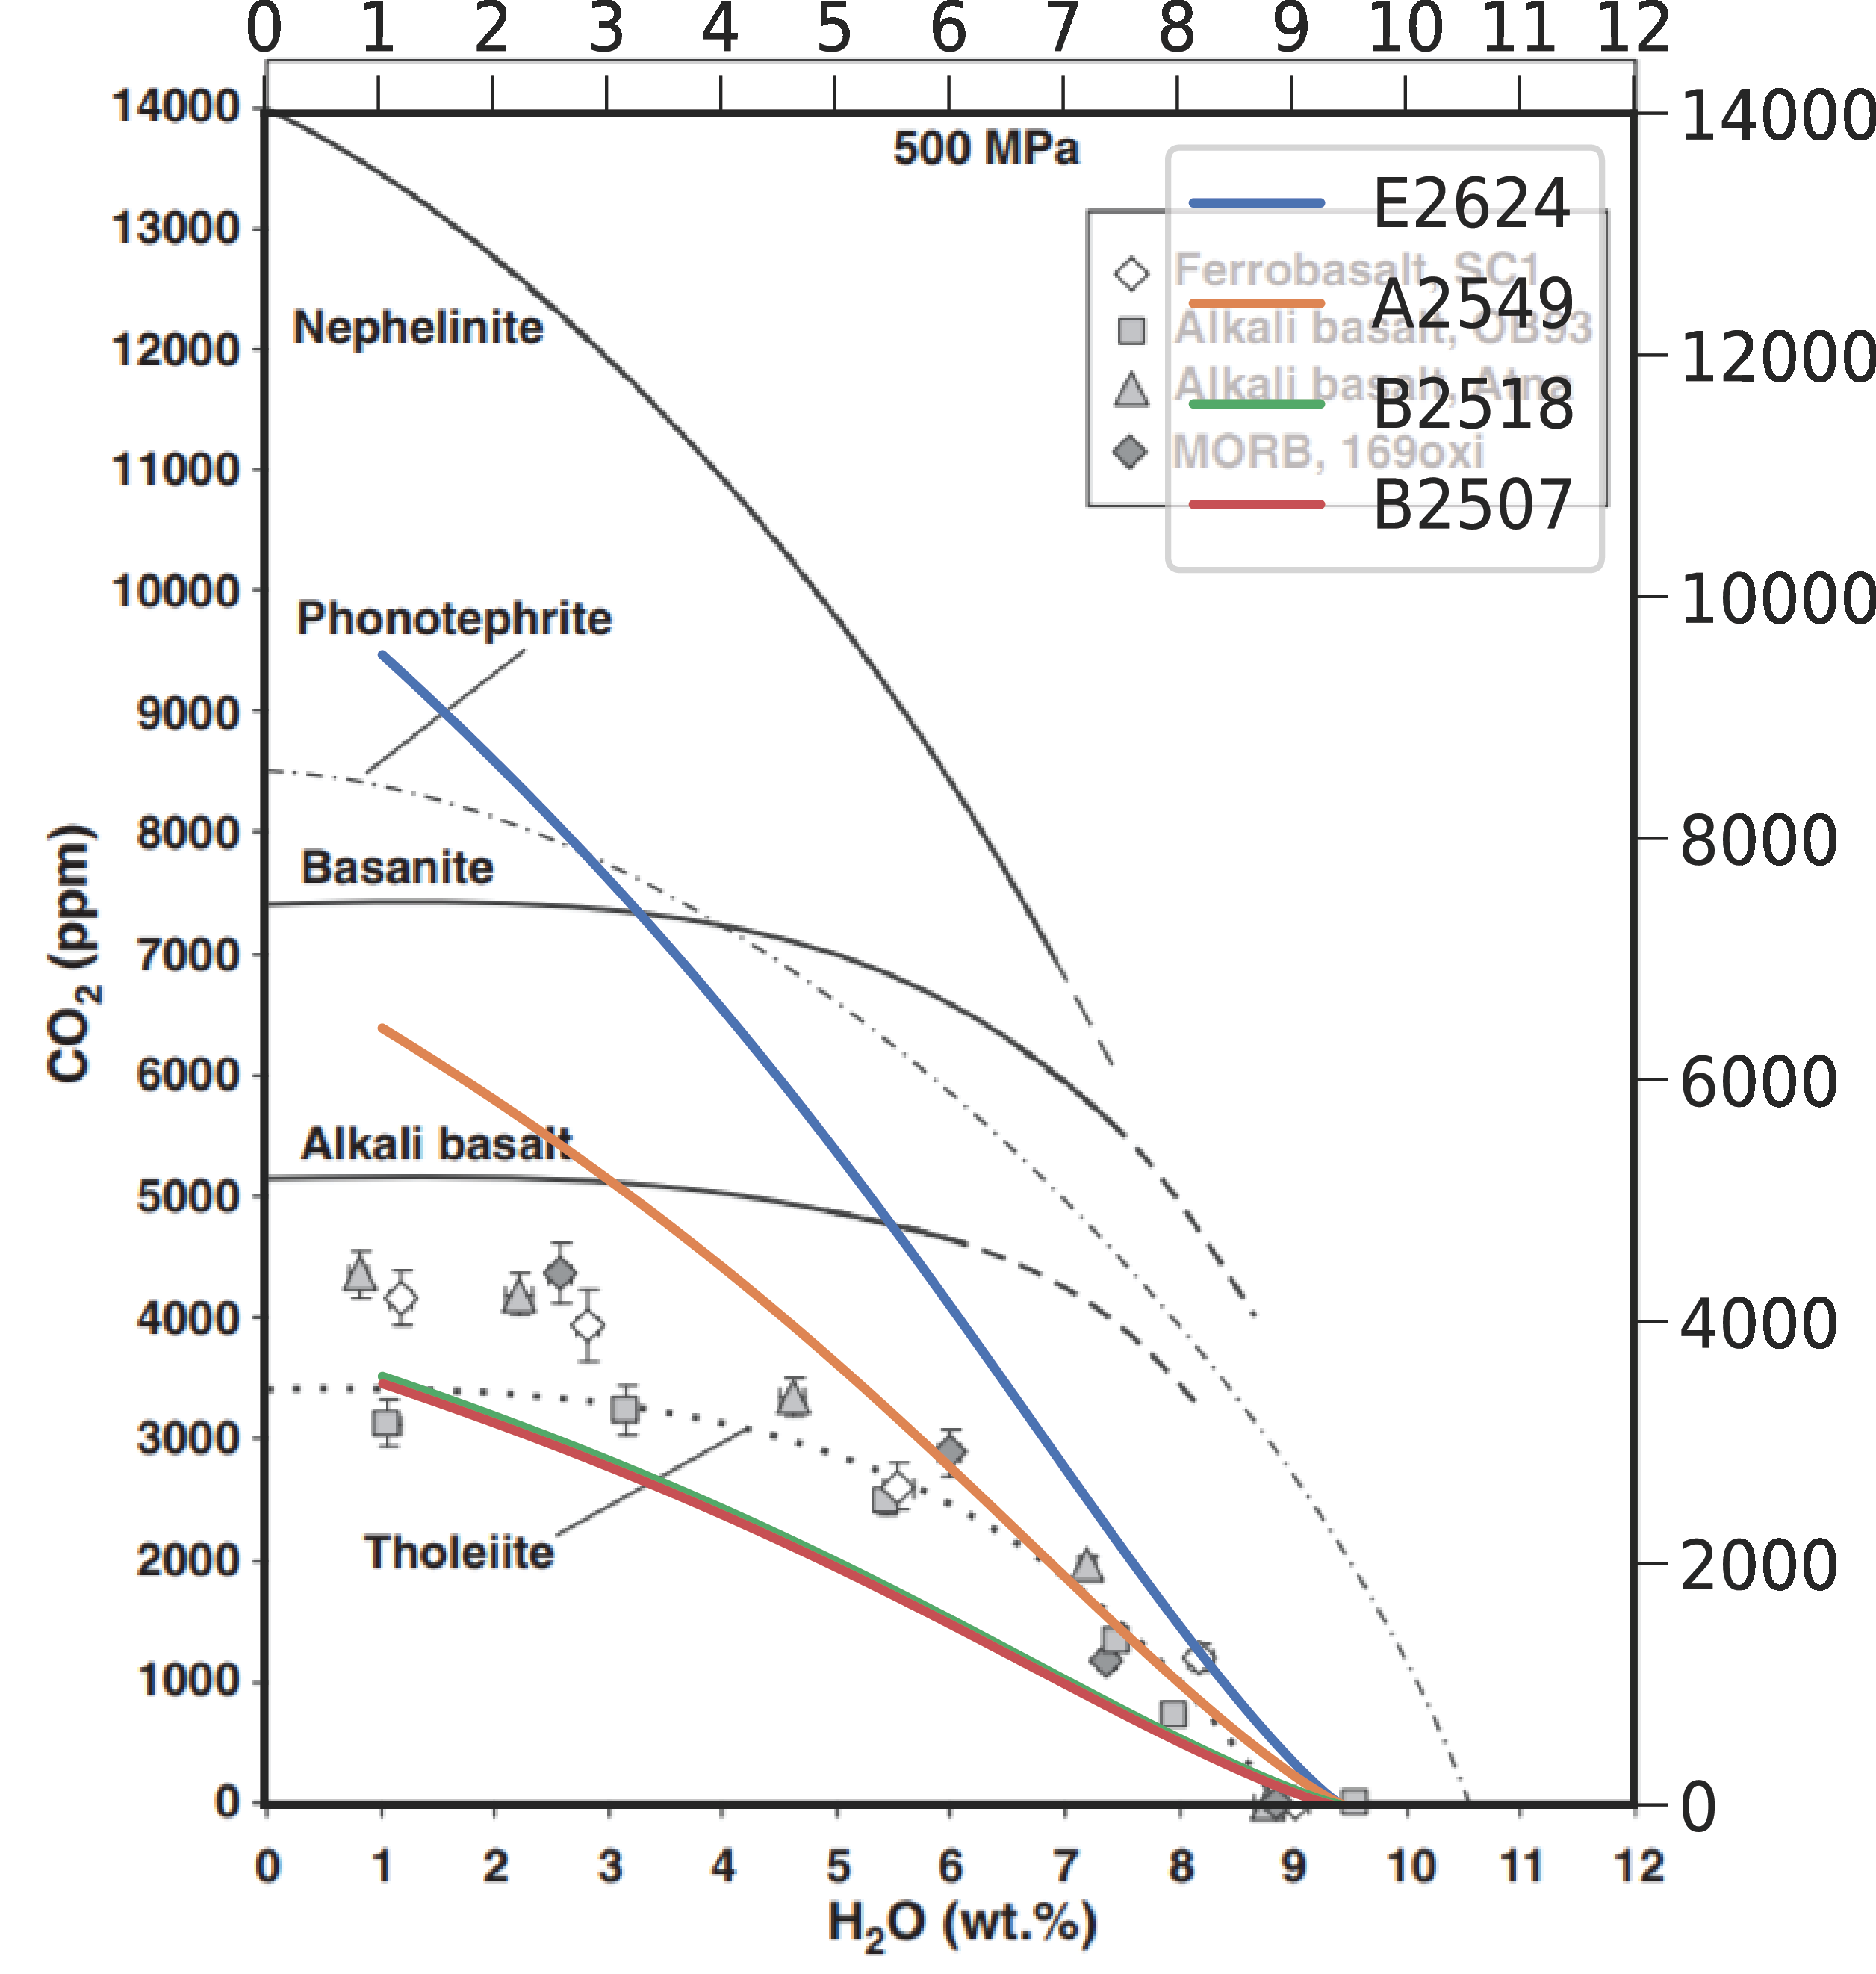